In [34]:
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import subprocess
%matplotlib notebook

# Pathfinder Visualization
This uses our Java robot code and the Pathfinder library to output trajectory points to a `.csv` file we use to plot.

Parameters are:

- `dt` = iteration time, loop period (ms)
- `v_max` = max velocity (ft/sec)
- `a_max` = max acceleration (ft/sec/sec)
- `j_max` = max jerk (ft/sec/sec/sec)
- `waypoints` = x, y, and exit angle (degrees) 


In [64]:
dt     = 10
v_max  = 16
a_max  = 64
j_max  = a_max * 10

waypoints = [
    {"x": -4, "y": -1, "degrees": -45},
    {"x": -2, "y": -2, "degrees": 0},
    {"x": 0, "y": 0, "degrees": 0},
]

In [65]:
motion_input = {"pathfinder":{"dt":dt, "v_max": v_max, "a_max": a_max, "j_max": j_max, "waypoints": waypoints}}

In [66]:
process = subprocess.run("MOTION_OPTS=-Djava.library.path=../build/install/motion/lib ../build/install/motion/bin/motion '{}'".format(json.dumps(motion_input)), shell=True)

In [67]:
df = pd.read_csv("trajectory.csv", index_col="Time")

In [68]:
print("time to end point    = {:.0f} ms".format(df.index.max()))
print("max velocity         = {:.1f} ft/sec".format(df['Velocity'].max()))
print("max acceleration     = {:.1f} ft/sec^2".format(df['Acceleration'].max()))
print("max jerk             = {:.1f} ft/sec^3".format(df['Jerk'].max()))

time to end point    = 1460 ms
max velocity         = 16.0 ft/sec
max acceleration     = 64.0 ft/sec^2
max jerk             = 640.0 ft/sec^3


<IPython.core.display.Javascript object>


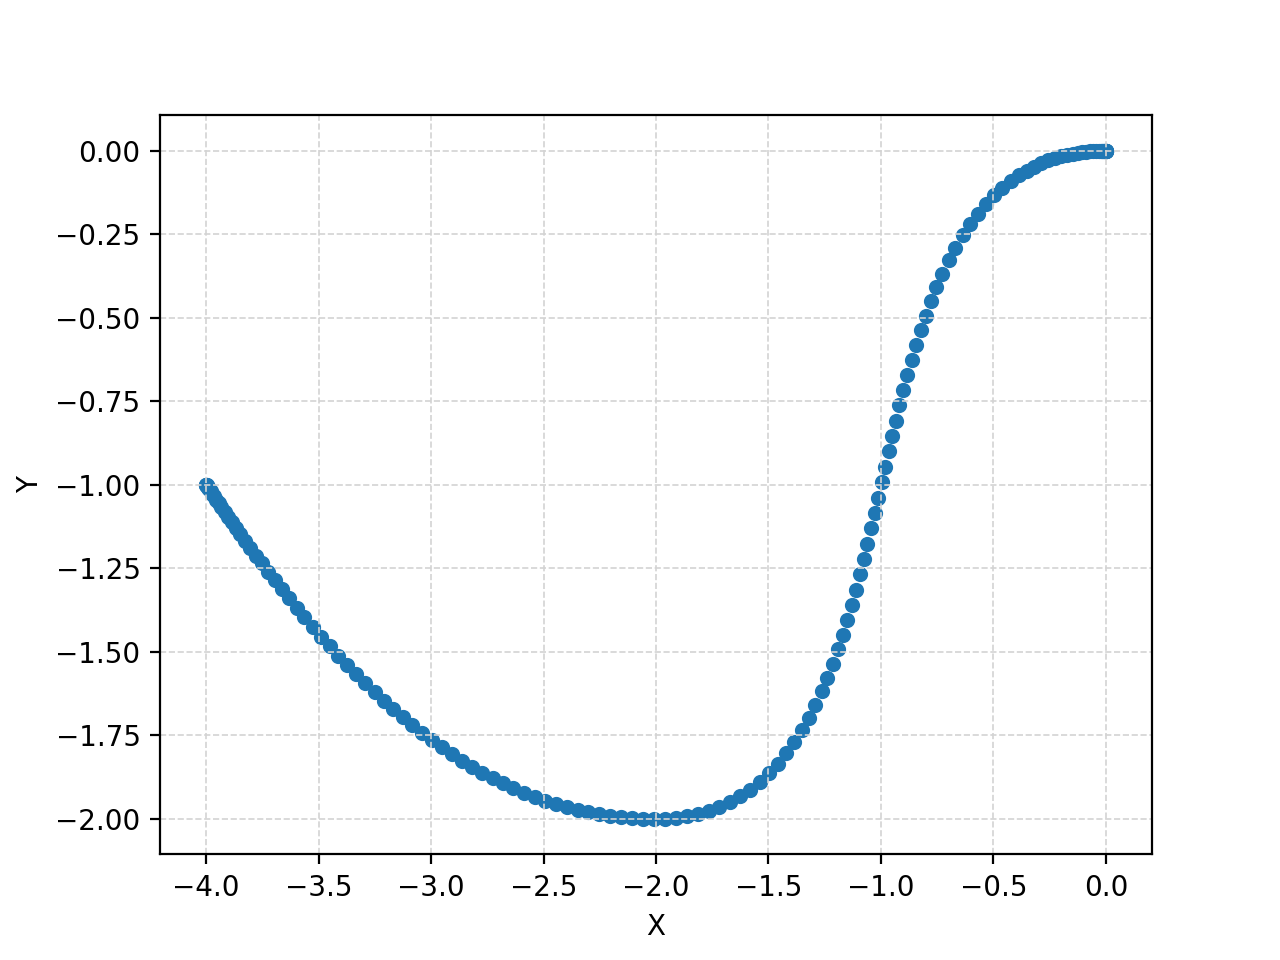

In [69]:
df.plot.scatter('X', 'Y')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)

<IPython.core.display.Javascript object>


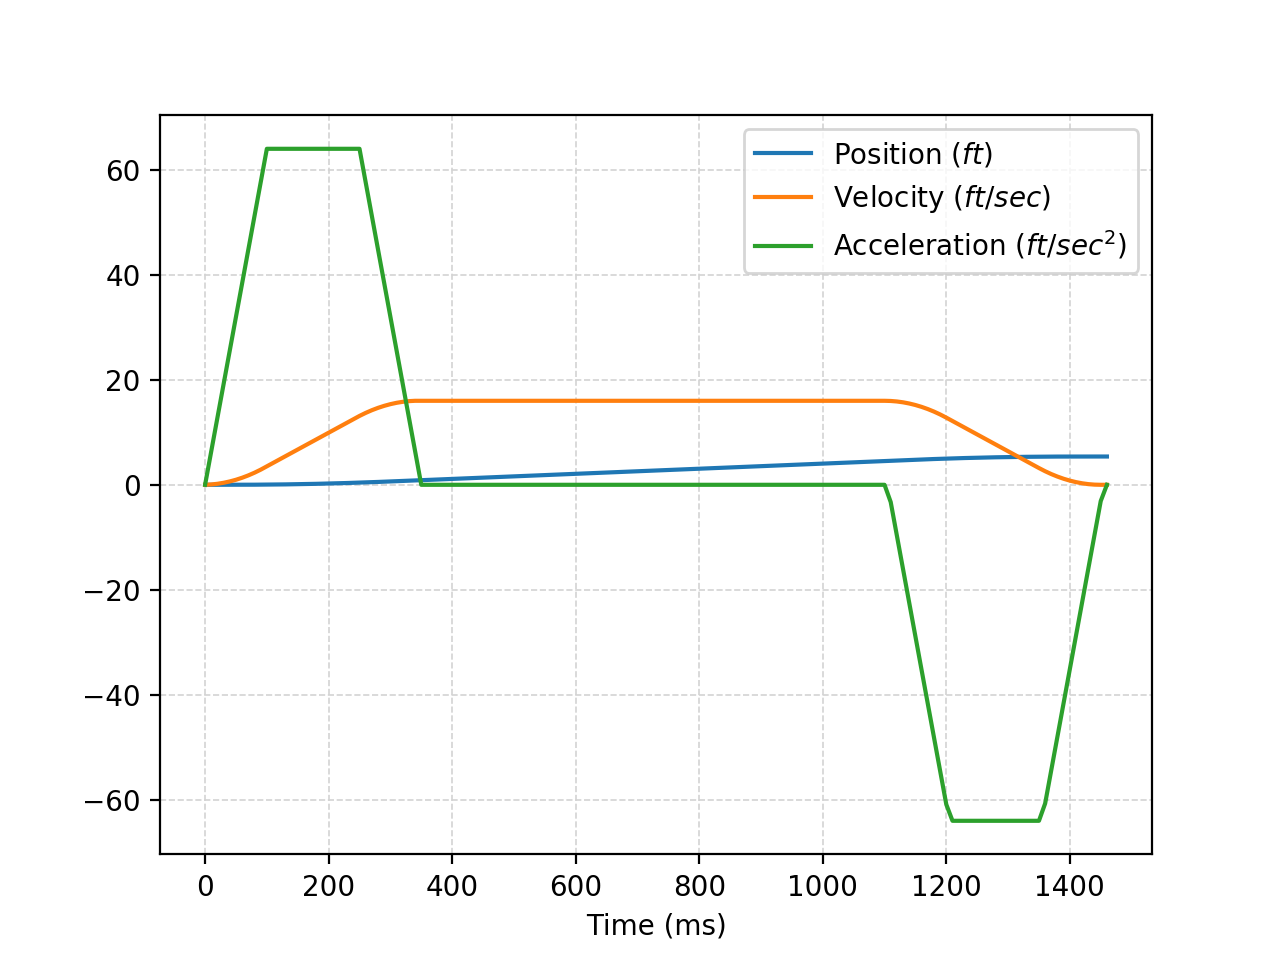

In [72]:
df.loc[:,['Position', 'Velocity', 'Acceleration']].plot()
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)
plt.xlabel("Time (ms)")
l = plt.legend(["Position ($ft$)", "Velocity ($ft/sec$)", "Acceleration ($ft/sec^2$)"])